In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('measurements2.xlsx')
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [4]:
data.isnull()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,True,True
4,False,False,False,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,True,False,False,False,False,True,True
384,False,False,False,False,False,False,False,False,False,False,True,True
385,False,False,False,False,False,True,False,False,False,False,True,True
386,False,False,False,False,False,False,False,False,False,False,True,True


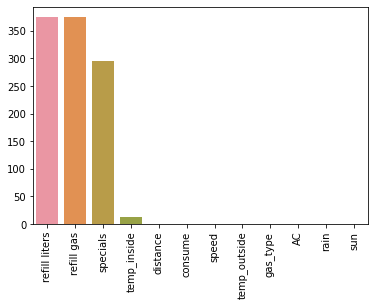

In [6]:
null_values = data.isnull().sum().sort_values(ascending=False)
ax=sns.barplot(x=null_values.index,y=null_values.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [7]:
data.drop(['refill gas','refill liters', 'specials'],axis=1,inplace=True)

<AxesSubplot: >

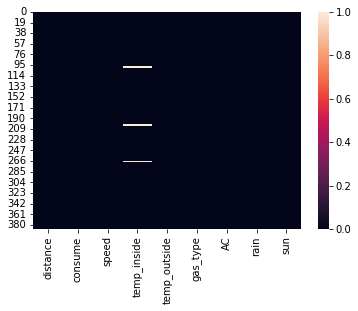

In [9]:
sns.heatmap(data.isnull())

In [10]:
temp_inside_mean=np.mean(data['temp_inside'])
temp_inside_mean

21.929521276595743

In [12]:
data['temp_inside'].fillna(temp_inside_mean,inplace=True)

<AxesSubplot: >

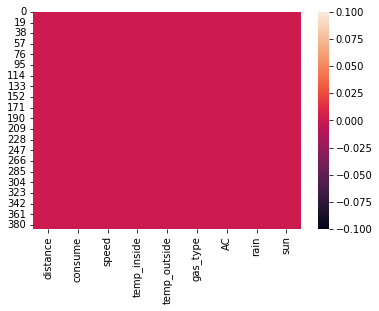

In [14]:
sns.heatmap(data.isnull())

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [16]:
x=data.drop(['consume','gas_type'], axis=1)
y=data['consume']

In [17]:
x.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain',
       'sun'],
      dtype='object')

In [18]:
x=x.values
y=y.values

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
l.fit(X_train,y_train)

LinearRegression()

In [23]:
X_train.shape

(271, 7)

In [24]:
y_pred=l.predict(X_test)

In [25]:
print(l.coef_,l.intercept_)

[ 0.00523674 -0.02371772 -0.14711979 -0.03724498  0.41456804  0.61676684
 -0.06407861] 9.389308142257125


In [26]:
from sklearn import metrics
print (metrics.mean_squared_error(y_test,y_pred))
print (metrics.mean_absolute_error(y_test,y_pred))
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.742453260904708
0.6635761182069626
0.8616572757800562


In [28]:
dum1=pd.get_dummies(data['gas_type'])
print(dum1)

     E10  SP98
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0
..   ...   ...
383    0     1
384    0     1
385    0     1
386    0     1
387    0     1

[388 rows x 2 columns]


In [30]:
data=pd.concat([data,dum1],axis=1)

In [31]:
data.drop('gas_type',axis=1,inplace=True)

In [33]:
x1=data.drop('consume',axis=1)
y1=data['consume']

In [34]:
x1.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun',
       'E10', 'SP98'],
      dtype='object')

In [35]:
x1=x1.values
y1=y1.values

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [37]:
l.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred1=l.predict(X_test)
y_pred1

array([4.80398179, 5.24631572, 5.16373706, 5.23299719, 4.52776021,
       5.99062392, 5.73193936, 5.23198354, 5.8898096 , 4.94684204,
       4.0800537 , 4.78422755, 6.55357901, 4.50083061, 5.1268724 ,
       5.24267179, 5.61167026, 5.14823973, 5.48324723, 5.36437201,
       4.13422549, 5.30350959, 4.94565881, 5.23290799, 4.88631664,
       4.79418748, 4.55506668, 4.28205093, 5.10144732, 3.90735262,
       4.97478302, 5.29391251, 4.75042548, 4.56699402, 5.53113778,
       5.02945576, 4.6453334 , 4.03415275, 5.10287619, 6.16080817,
       4.47545803, 5.28255966, 5.37539962, 4.41278157, 4.69332325,
       4.39387259, 5.10382269, 5.1927726 , 4.95992397, 4.98995489,
       4.87121094, 5.4268889 , 5.44648531, 5.28120341, 4.61905757,
       4.90286809, 6.70123899, 5.3534319 , 4.71689758, 4.78621524,
       5.50574979, 4.9290579 , 4.55311849, 4.81518093, 4.36022913,
       4.75672285, 5.55769604, 4.34876836, 4.82767226, 4.91585314,
       4.28138845, 4.6582407 , 5.19170002, 4.97280779, 5.18528

In [39]:
from sklearn import metrics
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.8616572757800562


In [40]:
X_train.shape

(271, 9)

In [41]:
X_train[0]

array([12.3, 62. , 21.5,  6. ,  0. ,  0. ,  0. ,  1. ,  0. ])

In [42]:
import joblib
joblib.dump(l, 'model.save')

['model.save']